<a href="https://colab.research.google.com/github/magdoch/ML_python_projects/blob/main/%22HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%A1%D0%BE%D1%80%D0%BE%D0%BA%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [68]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
medical_df= pd.read_csv("/content/drive/MyDrive/Jypiter Project/medical-charges.csv")

In [5]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Однозначно звернула б увагу на вік, бо чим старша людина тим більше в неї може зявлятися хворіб і потреб звернутися до лікаря
2. Чи курить людина чи ні має сильний вплив на здоров`я і відповідно на витічні з цієї звички хвороби
3. Також регіон проживання впливає і можуть бути різни хвороби повязані з кліматичними умовами.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
medical_df.sex.describe()

,sex
count,1338
unique,2
top,male
freq,676


In [16]:
fig_sex = px.histogram(medical_df,
    x="charges",
    color="sex",
    nbins=50,
    marginal="box",
    title="Розподіл медичних зборів за статтю"
)
fig_sex.update_layout(bargap=0.1)
fig_sex.show()

Висновок: в обох випадках ми маємо правосторонньо скошений графік. У чоловіків витрати більші аніж у жінок. Обидві станни мають багато викидів, проте в чоловіків дуже високих виплат >35к більше аніж у жінок.

In [17]:
medical_df.region.describe()

,region
count,1338
unique,4
top,southeast
freq,364


In [32]:
fig_region = px.histogram(medical_df,
    x="charges",
    facet_col="region",
    nbins=50,
    marginal="box",
    title="Розподіл медичних зборів за регіонами"
)
fig_sex.update_layout(bargap=0.1)
fig_sex.show()

In [69]:
fig_region = px.histogram(medical_df,
    x="charges",
    color="region",
    nbins=50,
    marginal="box",
    title="Розподіл медичних зборів за регіонами"
)
fig_sex.update_layout(bargap=0.1)
fig_sex.show()

Висновок: для всіх регіонів спостерігаєм правоскошений графік. В регіоні southwest найменший розкид і найменша медіана, що свідчить про більш менш стабільну ситуація, проте також спостерігається багато викидів.В регіоні southheast найширший розкид та найвищі викиди, найваріативніші витрати.Northeast також характеризується широким розкидом та найвищою медіаною. Присутньо багато викидів.Nortwest показує щось середнє між southwest та northeast.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [30]:
fig_region_smoker = px.histogram(
    medical_df,
    x="region",
    color="smoker",
    barmode="group",
    title="Розподіл курців та некурців за регіонами"
)
fig_region_smoker.update_layout(bargap=0.1)
fig_region_smoker.show()

Висновок:найбільше курців в регіоні southeast,це також тепер частково пояснює попередній графік про найвищі збори в цьому регіоні. Одинаково найменша і однакова кількисть курців в  southwest та northwest.

In [70]:
fig_children_smoker = px.histogram(
    medical_df,
    x="children",
    color="smoker",
    barmode="group",
    title="Розподіл курців та некурців за кількистю дітей"
)
fig_children_smoker.update_layout(bargap=0.1)
fig_children_smoker.show()

In [35]:
medical_df['children'].value_counts(normalize=True) * 100


,proportion
children,
0,42.899851
1,24.215247
2,17.937220
3,11.733931
4,1.868460
5,1.345291


In [41]:
pd.crosstab(medical_df['children'],medical_df['smoker'],normalize='all') * 100

smoker,no,yes
children,,
0,34.304933,8.594918
1,19.656203,4.559043
2,13.826607,4.110613
3,8.819133,2.914798
4,1.644245,0.224215
5,1.270553,0.074738


In [39]:
pd.crosstab(medical_df['children'],medical_df['smoker'],normalize='index') * 100

smoker,no,yes
children,,
0,79.965157,20.034843
1,81.172840,18.827160
2,77.083333,22.916667
3,75.159236,24.840764
4,88.000000,12.000000
5,94.444444,5.555556


Висновок:хоч найбільше курців взагальному в категорії без дітей, бо ця категорія є найбільш опитаною імовірно, проте якщо подивится відсотково по кожній категорії то можна побачити що люди які мають 3-ох дітей відсотково курять найбільше майже 25%. Коли ж люди без дітей мають процент 20% курців.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [61]:
medical_df["children"] = medical_df["children"].astype(str)
fig_children = px.violin(medical_df,
    x="children",
    y="charges",
    color="children",
    box= True,
    points="all",
    #points="suspectedoutliers",
    category_orders={"children": ["0","1","2","3","4","5"]},
    title="Розподіл медичних зборів за кількістю дітей"
)
#fig_children.update_layout(bargap=0.1)
fig_children.show()

Висновок:не відображається чітких залежностей між кількістю дітей та страховими внесками, спостерігається також дуже багато викидів майже у всіх категоріях окрім для сімей з 4 та 5-ма дітьми. Це свідчить про слабкий або відсутній прямий звʼязок між кількістю дітей та  страховими внесками.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [62]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

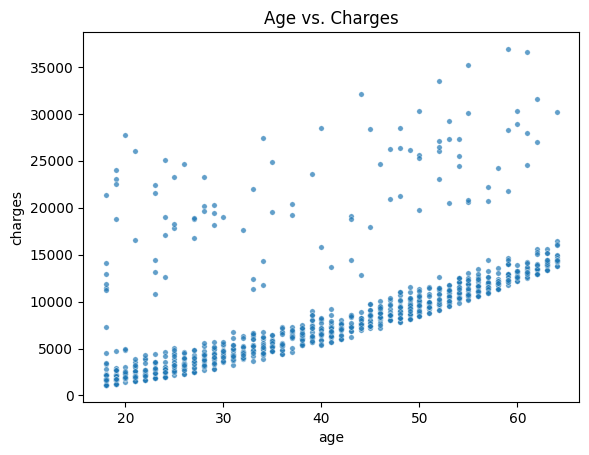

In [121]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [63]:
def estimate_charges(age, w, b):
    return w * age + b

In [168]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

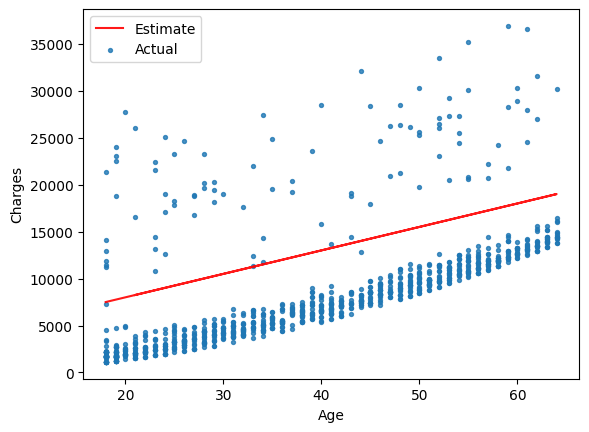

In [71]:
try_parameters(non_smoker_df, 250, 3000)

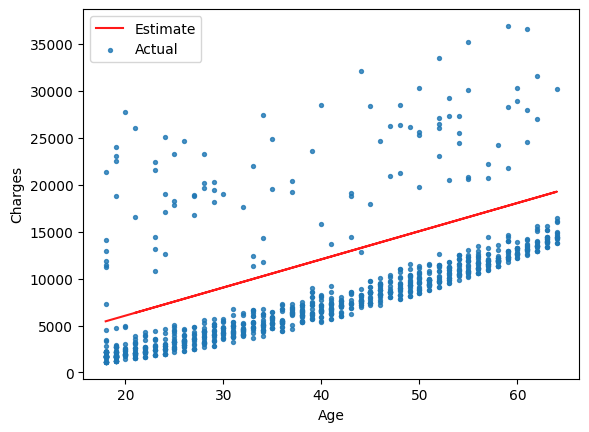

In [76]:
try_parameters(non_smoker_df, 300, 50)

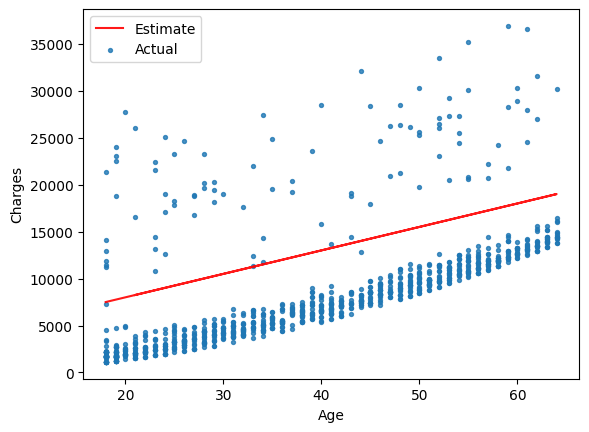

In [84]:
try_parameters(non_smoker_df, 250, 3000)

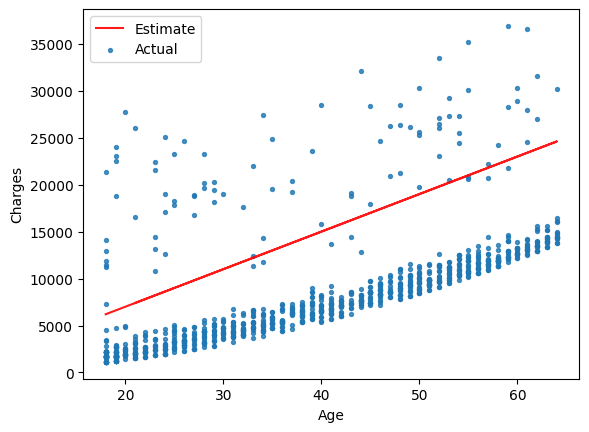

In [86]:
try_parameters(non_smoker_df, 400, -1000)

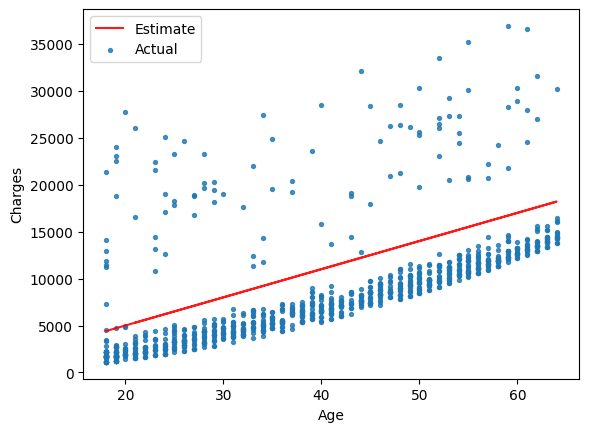

In [85]:
try_parameters(non_smoker_df, 300, -1000)

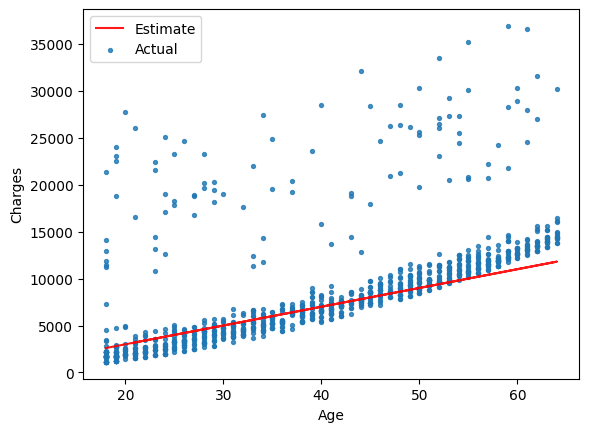

In [87]:
try_parameters(non_smoker_df, 200, -1000)

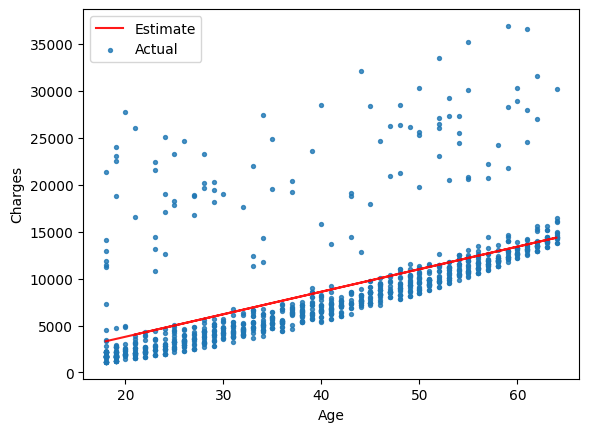

In [88]:
try_parameters(non_smoker_df, 240, -1000)

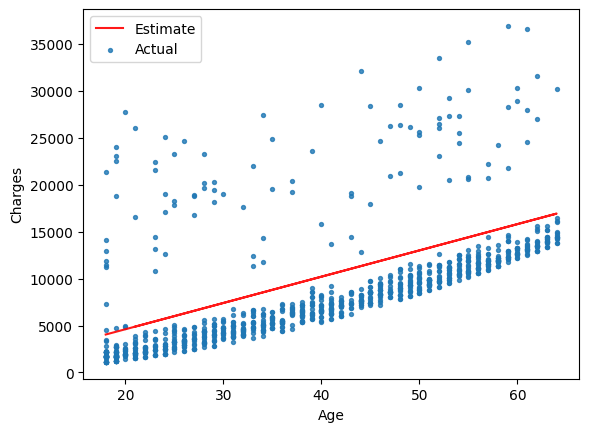

In [169]:
try_parameters(non_smoker_df, 280, -1000)

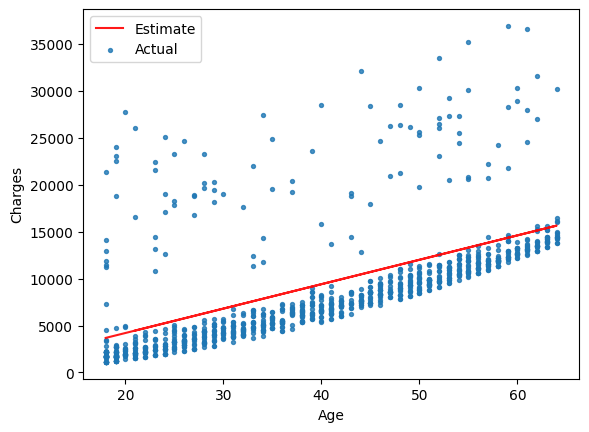

In [100]:
try_parameters(non_smoker_df, 260, -1000)

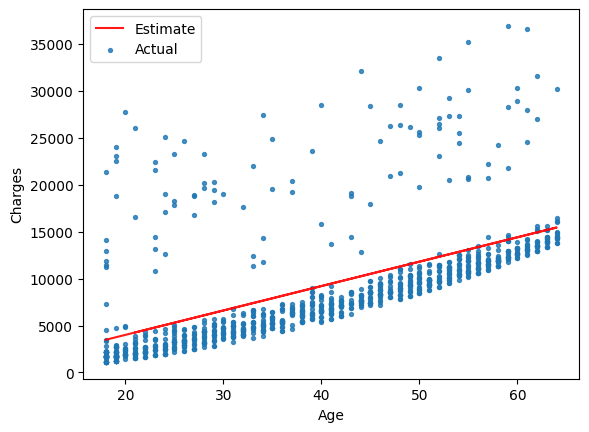

In [98]:
try_parameters(non_smoker_df, 260, -1200)

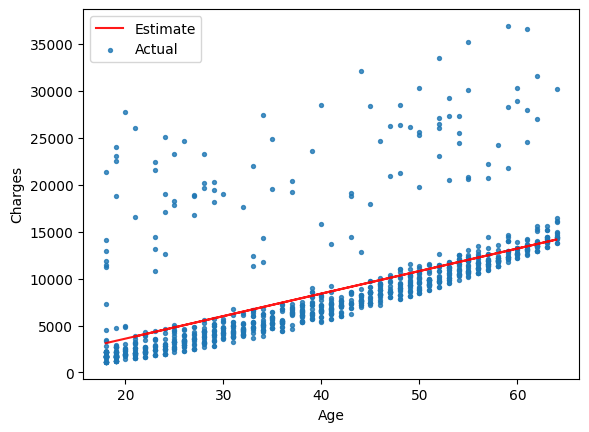

In [101]:
try_parameters(non_smoker_df, 240, -1200)

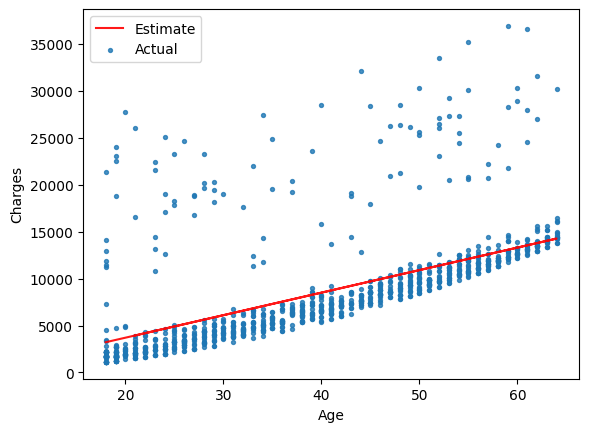

In [102]:
try_parameters(non_smoker_df, 240, -1100)

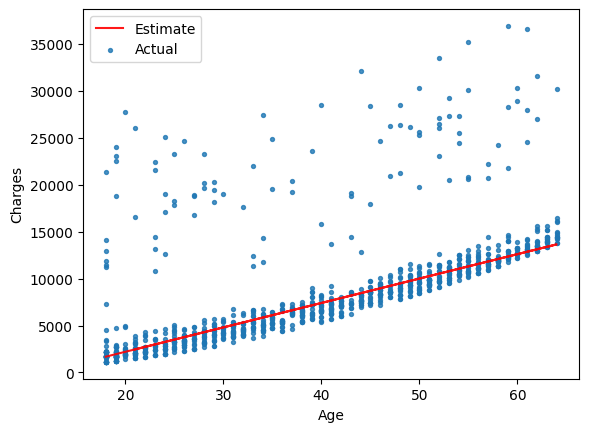

In [120]:
try_parameters(non_smoker_df, 260, -3000)

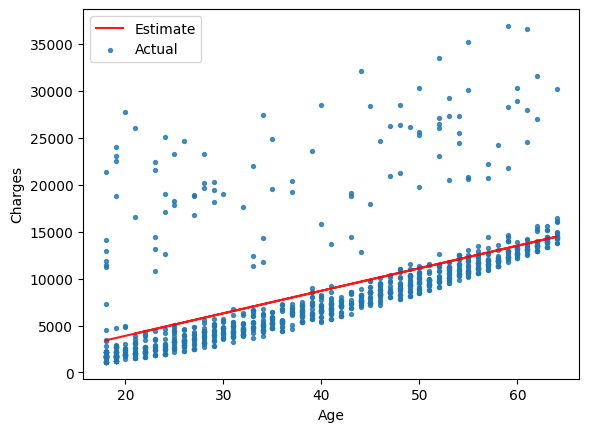

In [160]:
try_parameters(non_smoker_df, 240, -900)

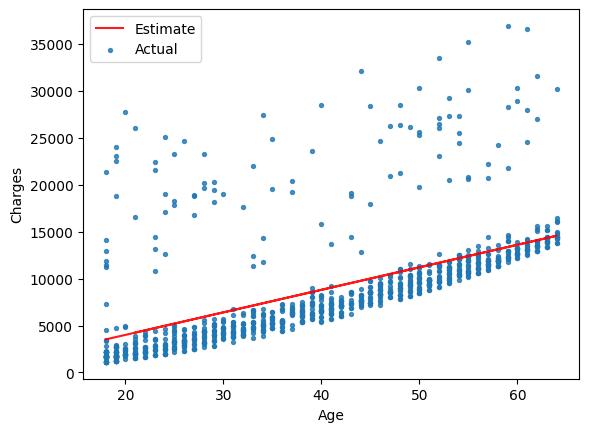

In [170]:
try_parameters(non_smoker_df, 240, -800)

Висновок: завдяки нахилу та зміщенню, і методам проб та помилок я підібрала двай найбільш оптимальних значення щоб лінія відповідала даним.𝑤 =240, а  𝑏 =-800.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [122]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [126]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [172]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [174]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4816.941379466545


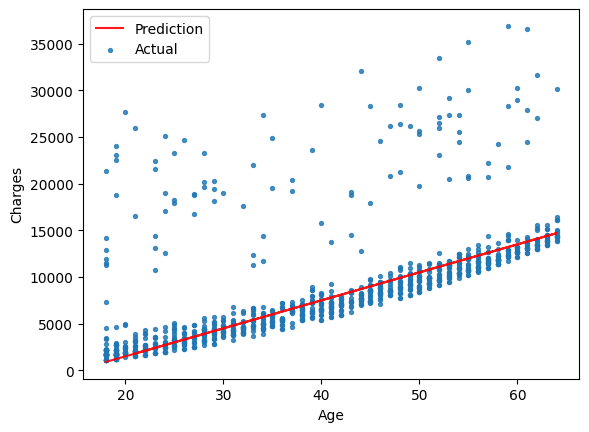

In [190]:
try_parameters(240, -800)

Висновок:найнижче значення якого мені вдалося досягнути це 4683,34. Для того, щоб наблизитися до такого результату мені прицшлося зробити зміщення відємним, проте якось покращити ще більше результат не вдалося.